#Convolution Neural Networks

##7.1. From Fully Connected Layers to Convolutions

Tabular data, consisting of rows as examples and columns as features, can be modeled well with MLPs when no feature structure is assumed. However, for high-dimensional perceptual data like images, MLPs require a vast number of parameters, making them impractical to train. Reducing resolution doesn't solve this, as effective image representation still needs billions of parameters and large datasets. Convolutional Neural Networks (CNNs) overcome this by exploiting the inherent structure in images, making them more efficient for visual tasks than fully connected networks.

###7.1.1. Invariance

When detecting objects in images, it’s crucial for the recognition method to be location-agnostic. This means that a system should be able to identify an object regardless of its position in the image, similar to finding Waldo in the "Where’s Waldo" game. CNNs take advantage of this concept by applying translation invariance—ensuring that a patch of the image is interpreted similarly no matter where it appears. They also follow the locality principle, where early network layers focus on local features before deeper layers combine these features to understand larger patterns across the image. This hierarchical structure allows CNNs to learn efficiently while capturing both local and global aspects of visual data.

###7.1.2. Constraining the MLP

To start off, we can consider an MLP with two-dimensional images $\mathbf{X}$ as inputs and their immediate hidden representations $\mathbf{H}$ similarly represented as matrices (they are two-dimensional tensors in code), where both $\mathbf{X}$ and $\mathbf{H}$ have the same shape. Consequently, to have each of the hidden units receive input from each of the input pixels, we would switch from using weight matrices (as we did previously in MLPs) to representing our parameters as fourth-order weight tensors $\mathbf{W}$. Suppose that $\mathbf{U}$ contains biases, we could formally express the fully connected layer as

$$[\mathbf{H}]_{i,j} = [\mathbf{U}]_{i,j} + \sum_k \sum_l [\mathbf{W}]_{i,j,k,l} [\mathbf{X}]_{k,l} $$ $$= [\mathbf{U}]_{i,j} + \sum_a \sum_b [\mathbf{V}]_{i,j,a,b} [\mathbf{X}]_{i+a,j+b}$$

The switch from $\mathbf{W}$ to $\mathbf{V}$ is entirely cosmetic for now since there is a one-to-one correspondence between coefficients in both fourth-order tensors. Before we carry on, let’s consider the total number of parameters required for a single layer in this parametrization: a $1000 \times 1000$ image (1 megapixel) is mapped to a $1000 \times 1000$ hidden representation. This requires $10^{12}$ parameters, far beyond what computers currently can handle.

####7.1.2.1. Translation Invariance

The translation invariance implies that shifting the input $ \mathbf{X} $ results in a corresponding shift in the hidden representation $ \mathbf{H} $. To achieve this, the parameters $ \mathbf{V} $ and $ \mathbf{U} $ must be independent of their specific locations in the image. This simplifies the representation, allowing $ \mathbf{V}_{i,j,a,b} $ to be expressed as $ \mathbf{V}_{a,b} $ and $ \mathbf{U} $ to be a constant value $ u $. Consequently, the expression for $ \mathbf{H} $ becomes a convolution, where pixels around a location $ (i, j) $ are weighted using coefficients $ \mathbf{V}_{a,b} $. This greatly reduces the number of parameters needed, from $ 10^{12} $ to $ 4 \times 10^6 $, since $ a $ and $ b $ vary within a fixed range. This concept was effectively utilized in Time-delay neural networks (TDNNs).

####7.1.2.2. Locality

The principle of locality, suggesting that to assess the situation at $ \mathbf{H}_{i,j} $, only nearby information is needed. For positions outside a defined range, the weights $ \mathbf{V}_{a,b} $ are set to zero. This simplifies the convolution equation to limit $ a $ and $ b $ within $ -\Delta $ and $ \Delta $, reducing parameters to $ 4 \Delta^2 $, with $ \Delta $ typically being less than 10. This significantly reduces parameters by several orders of magnitude, which is the essence of a convolutional layer.

Convolutional Neural Networks (CNNs) consist of these convolutional layers, where $ \mathbf{V} $ is known as the convolution kernel, filter, or weights. While earlier models needed billions of parameters for a single layer, modern networks require just a few hundred without altering input or hidden dimensionality. The trade-off is that these networks incorporate translation invariance and only local information, imposing inductive bias.

When the bias aligns with reality, the model efficiently generalizes to new data. However, if the assumptions (like translation invariance) are incorrect, the model may struggle. This parameter reduction leads to the notion that deeper layers are needed to capture complex image features, achieved by interleaving nonlinearities and convolutional layers.

###7.1.3. **Convolution**

###7.1.4. Channels

Convolutional layers process images using filters like $V$ to detect specific features (e.g., "waldoness"). It highlights that images are 3D tensors with red, green, and blue channels ($1024 \times 1024 \times 3$), requiring the convolutional filter to adapt from $V_{a,b}$ to $V_{a,b,c}$. Hidden representations, $H$, are also treated as 3D tensors to capture spatial details across multiple channels or feature maps. To support these, a fourth coordinate is added to $V$, resulting in $V_{a,b,c,d}$, and equation (7.1.7) describes the process of calculating $H$. The text concludes by noting that further operations are needed to combine all hidden representations and efficiently compute the final output.

##Summary and Discussion

The structure of CNNs, emphasizing that translation invariance and locality are key principles. Translation invariance ensures all image patches are treated similarly, and locality limits processing to small neighborhoods of pixels. The Neocognitron (Fukushima, 1982) is one of the earliest references to CNNs. The text also discusses reducing model complexity by limiting parameters while retaining expressive power. Adding channels (beyond red, green, blue) helps regain some complexity, particularly in fields like agriculture or meteorology, where hyperspectral images are common. It concludes with a focus on manipulating image dimensions and dealing with many categories efficiently using convolutions.

##Exercises

Here is the text written down from the image you provided:

---

### 7.1.6. Exercises

1. Assume that the size of the convolution kernel is $\Delta = 0$. Show that in this case the convolution kernel implements an MLP independently for each set of channels. This leads to the Network in Network architectures (Lin et al., 2013).

2. Audio data is often represented as a one-dimensional sequence.
   1. When might you want to impose locality and translation invariance for audio?
   2. Derive the convolution operations for audio.
   3. Can you treat audio using the same tools as computer vision? Hint: use the spectrogram.

3. Why might translation invariance not be a good idea after all? Give an example.

4. Do you think that convolutional layers might also be applicable for text data? Which problems might you encounter with language?

5. What happens with convolutions when an object is at the boundary of an image?

6. Prove that the convolution is symmetric, i.e., $f * g = g * f$.

##7.2 Convolution for Images

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

###7.2.1. The Cross-Correlation Operation

Convolutional layers technically perform cross-correlation, not convolution. The example in Fig. 7.2.1 demonstrates a 2D cross-correlation with a $3 \times 3$ input tensor and a $2 \times 2$ kernel. The kernel slides over the input tensor, multiplying and summing elements to produce a smaller $2 \times 2$ output tensor. The equations detail how each output element is calculated. The output size is determined by subtracting the kernel dimensions from the input dimensions. Padding can be used to maintain the same output size as the input, ensuring the kernel covers all areas of the image.

In [ ]:
def corr2d(X, K):
    """Compute 2D cross-correlation."""
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return Y

In [ ]:
def corr2d(X, K):
    """Compute 2D cross-correlation."""
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return Y

##7.2.2. Convolutional Layers

In [ ]:
class Conv2D(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        return corr2d(x, self.weight) + self.bias

In an $h \times w$ convolution or convolution kernel, $h$ and $w$ represent the height and width of the kernel, respectively. A convolutional layer with such a kernel is simply referred to as an $h \times w$ convolutional layer.

###7.2.3. Object Edge Detection in Images

In [ ]:
X = torch.ones((6, 8))
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

A kernel $K$ with a height of 1 and width of 2 is used to compute the difference between horizontally adjacent pixels. If the adjacent elements are the same, the output is 0; otherwise, it is nonzero. This kernel is a finite difference operator, which approximates the first derivative in the horizontal direction. The derivative of a function $f(i,j)$ is expressed as $\lim_{\epsilon \to 0} \frac{f(i,j) - f(i + \epsilon,j)}{\epsilon}$.

In [ ]:
K = torch.tensor([[1.0, -1.0]])

In [ ]:
Y = corr2d(X, K)
Y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

In [ ]:
corr2d(X.t(), K)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

###7.2.4. Learning a Kernel

In [ ]:
# Construct a two-dimensional convolutional layer with 1 output channel and a
# kernel of shape (1, 2). For the sake of simplicity, we ignore the bias here
conv2d = nn.LazyConv2d(1, kernel_size=(1, 2), bias=False)

# The two-dimensional convolutional layer uses four-dimensional input and
# output in the format of (example, channel, height, width), where the batch
# size (number of examples in the batch) and the number of channels are both 1
X = X.reshape((1, 1, 6, 8))
Y = Y.reshape((1, 1, 6, 7))
lr = 3e-2  # Learning rate

for i in range(10):
    Y_hat = conv2d(X)
    l = (Y_hat - Y) ** 2
    conv2d.zero_grad()
    l.sum().backward()
    # Update the kernel
    conv2d.weight.data[:] -= lr * conv2d.weight.grad
    if (i + 1) % 2 == 0:
        print(f'epoch {i + 1}, loss {l.sum():.3f}')

epoch 2, loss 12.192
epoch 4, loss 2.266
epoch 6, loss 0.471
epoch 8, loss 0.116
epoch 10, loss 0.035


In [ ]:
conv2d.weight.data.reshape((1, 2))

tensor([[ 0.9660, -0.9991]])

###7.2.5. Cross-Correlation and Convolution

The difference between cross-correlation and convolution. To perform strict convolution, the kernel is flipped both horizontally and vertically before applying cross-correlation. However, since kernels are learned from data in deep learning, the output remains the same regardless of using cross-correlation or convolution. For example, if a convolutional layer learns kernel $\mathbf{K}$ through cross-correlation and then performs strict convolution, the output remains the same after flipping $\mathbf{K}$ into $\mathbf{K}'$. Despite the technical distinction, deep learning literature often uses the term convolution for both operations. Additionally, the term "element" refers to any component of a tensor or convolution kernel.

###7.2.6. Feature Map and Receptive Field

The output of a convolutional layer is called a feature map, representing learned spatial features. Each element in the feature map has a receptive field, which consists of all the input elements that affect its computation. In Fig. 7.2.1, the receptive field of an output element is demonstrated. Receptive fields expand in deeper layers of the network, allowing the model to detect broader patterns. The concept of receptive fields comes from neurophysiology, where experiments on animals revealed how neurons in the visual cortex respond to different stimuli. This biological insight parallels convolutional kernels in deep learning. The features learned in deeper layers of neural networks, as demonstrated by Kuzovkin et al. (2018), resemble those in biological systems, confirming the effectiveness of convolutions in both biology and artificial intelligence.

##Summary

Convolutional layers primarily use cross-correlation, with computation being local and relatively simple, often implemented via matrix operations. This locality allows for efficient hardware optimization, which has made computer vision more accessible and affordable. Convolutions are versatile, used for tasks like edge detection and image enhancement. Importantly, the filters used in convolutional layers are not manually designed but learned from data, replacing traditional heuristics with data-driven methods. Moreover, convolutional filters align with biological concepts like receptive fields, which reinforces confidence in their effectiveness.

##Excercises

1. **Contruct Image X with diagonal edges**:
   - What happens when kernel $K$ is applied?
   - What happens when $X$ is transposed?
   - What happens when $K$ is transposed?

2. **Design kernels manually**:
   1. Edge detection kernel orthogonal to $\mathbf{v} = (v_1, v_2)$ for direction $(v_2, -v_1)$.
   2. Finite difference operator for second derivative and its convolutional kernel.
   3. Design a blur kernel and its application.
   4. Minimum kernel size for a derivative of order $d$.

3. **Error with Conv2D class**: Identify error message when computing gradients.

4. **Cross-correlation**: Representing it as matrix multiplication by altering input and kernel tensors.

##7.3. Padding and Stride

- A convolution example with input shape $n_h \times n_w$ and kernel shape $k_h \times k_w$ results in output shape $(n_h - k_h + 1) \times (n_w - k_w + 1)$.
- Techniques like padding and strided convolutions help control output size. Without them, successive convolutions reduce the input image size significantly (e.g., ten $5 \times 5$ convolutions can reduce a $240 \times 240$ image to $200 \times 200$).
- **Padding**: Helps prevent loss of boundary information and dimensionality reduction.
- **Strided convolutions**: Useful for reducing input resolution efficiently.

In [ ]:
import torch
from torch import nn

###7.3.1. Padding

Convolution operations tend to lose pixels on the image borders, particularly when using kernels of different sizes and positions, as shown in Fig. 7.3.1, where pixel utilization changes based on the convolution size. To address this issue, padding is often applied, adding extra pixels around the image's boundary to increase the input size and prevent pixel loss. For example, padding a $3 \times 3$ input to a $5 \times 5$ matrix results in a larger output (Fig. 7.3.2). The formula for calculating the output shape with padding is $(n_h - k_h + p_h + 1) \times (n_w - k_w + p_w + 1)$, where $p_h$ and $p_w$ represent the number of padding rows and columns. Padding helps ensure that the input and output dimensions remain consistent, especially when using odd-sized kernels like $1 \times 1$, $3 \times 3$, or $5 \times 5$. CNNs typically use odd kernel sizes to preserve dimensionality and balance padding on all sides, simplifying the cross-correlation computation process. For example, applying a $3 \times 3$ kernel with one pixel of padding on an input of size $8 \times 8$ maintains the output size at $8 \times 8$.

In [ ]:
# We define a helper function to calculate convolutions. It initializes the
# convolutional layer weights and performs corresponding dimensionality
# elevations and reductions on the input and output
def comp_conv2d(conv2d, X):
    # (1, 1) indicates that batch size and the number of channels are both 1
    X = X.reshape((1, 1) + X.shape)
    Y = conv2d(X)
    # Strip the first two dimensions: examples and channels
    return Y.reshape(Y.shape[2:])

# 1 row and column is padded on either side, so a total of 2 rows or columns
# are added
conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1)
X = torch.rand(size=(8, 8))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

In [ ]:
# We use a convolution kernel with height 5 and width 3. The padding on either
# side of the height and width are 2 and 1, respectively
conv2d = nn.LazyConv2d(1, kernel_size=(5, 3), padding=(2, 1))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

###7.3.2. Stride

When computing cross-correlation, the convolution window starts at the upper-left corner of the input tensor and slides across the input both vertically and horizontally. Typically, the window moves one element at a time, but sometimes, for efficiency or downsampling purposes, the window moves more than one element, which is called a stride. Fig. 7.3.3 illustrates cross-correlation with a vertical stride of 3 and a horizontal stride of 2. The shaded regions represent the elements used in the output computation. The stride affects how the convolution window moves across the input, skipping rows or columns depending on the stride size.

In general, the output shape with strides is given by $\left\lfloor \frac{n_h - k_h + p_h + s_h}{s_h} \right\rfloor \times \left\lfloor \frac{n_w - k_w + p_w + s_w}{s_w} \right\rfloor$. If padding is added, we can simplify the output shape formula. When the strides are set on both height and width, the input dimensions are halved.

In [ ]:
conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1, stride=2)
comp_conv2d(conv2d, X).shape

torch.Size([4, 4])

In [ ]:
conv2d = nn.LazyConv2d(1, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))
comp_conv2d(conv2d, X).shape

torch.Size([2, 2])

##Summary and Discussion

Padding increases the height and width of the output, helping to maintain the original input dimensions and avoid shrinking. Typically, symmetric padding is used on both sides of the input dimensions, referred to as $(p_h, p_w)$ padding. In many cases, symmetric padding is applied uniformly, simply denoted as $p$.

Similarly, for strides, when both horizontal stride $s_h$ and vertical stride $s_w$ are the same, we refer to it as stride $s$. Strides can reduce the resolution of the output by a factor of $n$, where $n > 1$. By default, padding is set to $0$ and the stride is $1$.

Zero-padding is the most common method discussed, as it is computationally efficient. Zero-padding allows CNNs to encode implicit positional information within the image. There are other alternatives to zero-padding, though they are not often used unless artifacts arise, as noted by Alsallakh et al. (2020).

##Exercises

1. Calculate the output shape with kernel size $(3, 5)$, padding $(0, 1)$, and stride $(3, 4)$.
2. For audio signals, explain what a stride of 2 represents.
3. Implement mirror padding, where the border values are mirrored to extend tensors.
4. Discuss the computational benefits of using a stride larger than 1.
5. Explore the statistical benefits of using a stride larger than 1.
6. Implement a stride of $\frac{1}{2}$, explain what it corresponds to, and when it would be useful.

##7.4. Multiple Input and Multiple Output Channels

In [ ]:
import torch
from d2l import torch as d2l

###7.4.1. Multiple Input Channels

When handling input data with multiple channels, the convolution kernel must have the same number of channels ($c_i$) as the input. For single-channel input ($c_i = 1$), the kernel is two-dimensional with shape $k_h \times k_w$. However, for multi-channel input ($c_i > 1$), the kernel contains a tensor for each channel with shape $k_h \times k_w$, resulting in a convolution kernel of shape $c_i \times k_h \times k_w$. The cross-correlation operation sums the results across all channels to produce a two-dimensional output. Fig. 7.4.1 shows an example of cross-correlation with two input channels, where the output computation involves summing the contributions from both channels.

In [ ]:
def corr2d_multi_in(X, K):
    # Iterate through the 0th dimension (channel) of K first, then add them up
    return sum(d2l.corr2d(x, k) for x, k in zip(X, K))

In [ ]:
X = torch.tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
               [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

corr2d_multi_in(X, K)

tensor([[ 56.,  72.],
        [104., 120.]])

###7.4.2. Multiple Output Channels

In convolutional layers, having multiple channels at each layer is essential for increasing channel depth. This allows each channel to respond to different sets of features. Channels are optimized to be jointly useful, meaning that they work together to detect complex patterns like edges. For multiple input and output channels, we create a convolution kernel of shape $c_o \times c_i \times k_h \times k_w$, where $c_o$ is the number of output channels and $c_i$ is the number of input channels. Each output channel is calculated based on input from all channels, enabling deeper and more complex feature detection.

In [ ]:
def corr2d_multi_in_out(X, K):
    # Iterate through the 0th dimension of K, and each time, perform
    # cross-correlation operations with input X. All of the results are
    # stacked together
    return torch.stack([corr2d_multi_in(X, k) for k in K], 0)

In [ ]:
K = torch.stack((K, K + 1, K + 2), 0)
K.shape

torch.Size([3, 2, 2, 2])

In [ ]:
corr2d_multi_in_out(X, K)

tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])

###7.4.3. 1 X 1 Convolutional Layer

A $1 \times 1$ convolution may seem unnecessary since it does not correlate adjacent pixels. However, it is a common operation in deep networks, particularly for handling the channel dimension rather than the spatial dimension. The $1 \times 1$ convolution computes on the channel dimension, transforming the input values across different channels. Fig. 7.4.2 illustrates a $1 \times 1$ convolution with 3 input channels and 2 output channels, where each output element is a linear combination of the input channels. This operation is equivalent to applying a fully connected layer at each pixel location. The weights of the $1 \times 1$ convolution are shared across all pixel locations, requiring $c_o \times c_i$ weights. This convolutional layer is typically followed by non-linearities to add complexity to the model.

In [ ]:
def corr2d_multi_in_out_1x1(X, K):
    c_i, h, w = X.shape
    c_o = K.shape[0]
    X = X.reshape((c_i, h * w))
    K = K.reshape((c_o, c_i))
    # Matrix multiplication in the fully connected layer
    Y = torch.matmul(K, X)
    return Y.reshape((c_o, h, w))

In [ ]:
X = torch.normal(0, 1, (3, 3, 3))
K = torch.normal(0, 1, (2, 3, 1, 1))
Y1 = corr2d_multi_in_out_1x1(X, K)
Y2 = corr2d_multi_in_out(X, K)
assert float(torch.abs(Y1 - Y2).sum()) < 1e-6

##Disscussion

Channels enable the combination of non-linearities from MLPs and localized feature analysis through convolutions. This allows CNNs to detect multiple features, like edges and shapes, simultaneously, striking a balance between reducing parameters and maintaining expressiveness. However, this flexibility comes with a computational cost. For an image of size $h \times w$, the cost of computing a $k \times k$ convolution is $\mathcal{O}(h \cdot w \cdot k^2)$. When accounting for $c_i$ input and $c_o$ output channels, the cost increases to $\mathcal{O}(h \cdot w \cdot k^2 \cdot c_i \cdot c_o)$. For a $256 \times 256$ image with a $5 \times 5$ kernel and 128 channels, this results in over 53 billion operations. Strategies like block-diagonal channel-wise operations, as seen in architectures like ResNeXt, help mitigate these costs.

##Exercises

1. Prove the result of two convolution kernels $k_1$ and $k_2$ can be expressed as a single convolution.
   - Dimensionality of the equivalent single convolution.
   - Can a single convolution be decomposed into two smaller ones?

2. Input shape $c_i \times h \times w$ with kernel $c_o \times c_i \times k_h \times k_w$:
   - Computational cost for forward propagation.
   - Memory footprint.
   - Memory footprint for backward computation.
   - Computational cost for backpropagation.

3. How does doubling the input/output channels or padding affect the number of calculations?

4. Are variables Y1 and Y2 in the final example the same? Why?

5. Express convolutions as matrix multiplication, even if the window is not $1 \times 1$.

6. Implement fast convolutions with a $k \times k$ kernel:
   - Why is using a wider output strip $\Delta$ preferable?

7. Block-diagonal matrix multiplication:
   - Speed increase with $b$ blocks.
   - Downsides of using $b$ blocks and possible solutions.

##7.5. Pooling

When solving global tasks like image classification (e.g., detecting if an image contains a cat), the deeper layers of a CNN aggregate information to form a global representation. As we go deeper in the network, the receptive field increases, making each node sensitive to larger areas of the input. Reducing spatial resolution helps accelerate this process by covering larger effective areas with convolution kernels.

For detecting lower-level features like edges, we want the representation to be somewhat invariant to translation. A shift in the image by even one pixel can significantly alter the output, especially for sharp features. Pooling layers are introduced to mitigate sensitivity to location and downsample representations spatially, addressing this issue.

In [ ]:
import jax
from flax import linen as nn
from jax import numpy as jnp
from d2l import jax as d2l

###7.5.1. Maximum Pooling and Average Pooling

Pooling layers use a fixed-shape window, slid over the input based on the stride, to compute a single output for each region without any parameters (no kernel). The two common types are **max-pooling**, which takes the maximum value in the pooling window, and **average pooling**, which averages the values. Average pooling is used for downsampling by averaging adjacent pixels, while max-pooling, introduced for object recognition, is often preferred because it retains stronger features.

Fig. 7.5.1 demonstrates max-pooling with a $2 \times 2$ window, where the output is derived from the maximum values in each pooling window. The output tensor is smaller, with each element representing the maximum value from its respective region in the input. This approach is useful for tasks like edge detection, as pooling layers help retain important features while reducing the dimensionality.

In [ ]:
def pool2d(X, pool_size, mode='max'):
    p_h, p_w = pool_size
    Y = jnp.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y = Y.at[i, j].set(X[i: i + p_h, j: j + p_w].max())
            elif mode == 'avg':
                Y = Y.at[i, j].set(X[i: i + p_h, j: j + p_w].mean())
    return Y

In [ ]:
X = jnp.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
pool2d(X, (2, 2))

Array([[4., 5.],
       [7., 8.]], dtype=float32)

In [ ]:
pool2d(X, (2, 2), 'avg')

Array([[2., 3.],
       [5., 6.]], dtype=float32)

###7.5.2. Padding and Stride

In [ ]:
X = jnp.arange(16, dtype=jnp.float32).reshape((1, 4, 4, 1))
X

Array([[[[ 0.],
         [ 1.],
         [ 2.],
         [ 3.]],

        [[ 4.],
         [ 5.],
         [ 6.],
         [ 7.]],

        [[ 8.],
         [ 9.],
         [10.],
         [11.]],

        [[12.],
         [13.],
         [14.],
         [15.]]]], dtype=float32)

In [ ]:
# Pooling has no model parameters, hence it needs no initialization
nn.max_pool(X, window_shape=(3, 3), strides=(3, 3))

Array([[[[10.]]]], dtype=float32)

In [ ]:
X_padded = jnp.pad(X, ((0, 0), (1, 0), (1, 0), (0, 0)), mode='constant')
nn.max_pool(X_padded, window_shape=(3, 3), padding='VALID', strides=(2, 2))

Array([[[[ 5.],
         [ 7.]],

        [[13.],
         [15.]]]], dtype=float32)

In [ ]:
X_padded = jnp.pad(X, ((0, 0), (0, 0), (1, 1), (0, 0)), mode='constant')
nn.max_pool(X_padded, window_shape=(2, 3), strides=(2, 3), padding='VALID')

Array([[[[ 5.],
         [ 7.]],

        [[13.],
         [15.]]]], dtype=float32)

###7.5.3. Multiple Channels

In [ ]:
# Concatenate along `dim=3` due to channels-last syntax
X = jnp.concatenate([X, X + 1], 3)
X

Array([[[[ 0.,  1.],
         [ 1.,  2.],
         [ 2.,  3.],
         [ 3.,  4.]],

        [[ 4.,  5.],
         [ 5.,  6.],
         [ 6.,  7.],
         [ 7.,  8.]],

        [[ 8.,  9.],
         [ 9., 10.],
         [10., 11.],
         [11., 12.]],

        [[12., 13.],
         [13., 14.],
         [14., 15.],
         [15., 16.]]]], dtype=float32)

In [ ]:
X_padded = jnp.pad(X, ((0, 0), (1, 0), (1, 0), (0, 0)), mode='constant')
nn.max_pool(X_padded, window_shape=(3, 3), padding='VALID', strides=(2, 2))

Array([[[[ 5.,  6.],
         [ 7.,  8.]],

        [[13., 14.],
         [15., 16.]]]], dtype=float32)

##Summary

Pooling is a simple operation that aggregates results over a window of values, leaving the number of channels unchanged and applying to each channel separately. Max-pooling is typically preferred over average pooling because it provides some invariance to output. A common choice is using a $2 \times 2$ pooling window to reduce the spatial resolution by a factor of four.

There are also other methods for reducing resolution beyond pooling, such as stochastic pooling and fractional max-pooling, which combine randomization and pooling to improve accuracy in some cases. More refined aggregation methods, such as those seen in attention mechanisms, can further improve results by aligning query and representation vectors.

##Excercises

1. Implement average pooling through a convolution.
2. Prove that max-pooling cannot be implemented through a convolution alone.
3. Max-pooling using ReLU operations:
   1. Express $\text{max}(a, b)$ using ReLU.
   2. Implement max-pooling using convolutions and ReLU layers.
   3. How many channels and layers are needed for $2 \times 2$ and $3 \times 3$ convolutions?
4. What is the computational cost of a pooling layer with input size $c \times h \times w$, window shape $p_h \times p_w$, padding $(p_h, p_w)$, and stride $(s_h, s_w)$?
5. Why do max-pooling and average pooling work differently?
6. Do we need a separate minimum pooling layer? Can it be replaced by another operation?
7. Why is the softmax operation not popular for pooling?

##7.6. Convolutional Neural Networks (LeNet)

LeNet, developed by Yann LeCun in the 1990s at AT&T Bell Labs, was one of the first CNNs to gain wide attention for its performance on computer vision tasks, particularly in recognizing handwritten digits. LeCun's team pioneered the use of backpropagation to train CNNs, achieving remarkable results with less than 1% error per digit. LeNet's success matched that of support vector machines, and the model was later adapted for ATM machines, where it is still used to process digits for deposit recognition.

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

###7.6.1. LeNet

LeNet-5 consists of two main parts: (i) a convolutional encoder with two convolutional layers and (ii) a dense block with three fully connected layers. The architecture uses $5 \times 5$ convolutions followed by $2 \times 2$ pooling (stride 2), which reduces dimensionality through spatial downsampling. The first convolution outputs 6 channels, and the second outputs 16 channels. After flattening the feature maps, the dense block has three layers with 120, 84, and 10 outputs, corresponding to the number of classes.

This architecture efficiently processes inputs like handwritten digits, transforming them into class probabilities through its hierarchical feature extraction process.

In [ ]:
def init_cnn(module):
    """Initialize weights for CNNs."""
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)

class LeNet(d2l.Classifier):
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

In [ ]:
@d2l.add_to_class(d2l.Classifier)
def layer_summary(self, X_shape):
    X = torch.randn(*X_shape)
    for layer in self.net:
        X = layer(X)
        print(layer.__class__.__name__, 'output shape:\t', X.shape)

model = LeNet()
model.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


In LeNet, the height and width of the representation are reduced at each layer. The first convolutional layer uses padding to offset the reduction caused by a $5 \times 5$ kernel, whereas the second convolutional layer does not use padding, reducing the height and width by four pixels. The original 28 × 28 MNIST images were trimmed from 32 × 32 to save space. The number of channels increases with depth, from 1 in the input to 6 in the first convolutional layer and 16 in the second. Pooling layers halve the spatial dimensions, and fully connected layers further reduce the dimensionality until the final output matches the number of classes.

###7.6.2. Training

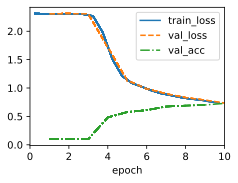

In [ ]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

##Summary

Here is the short note for the provided content:

This chapter traces the evolution from MLPs of the 1980s to CNNs like LeNet in the 1990s, showing how architectures like LeNet-5 remain relevant. LeNet bridges the gap between simple MLPs and more advanced models like ResNet. The increase in computational power enabled more complex architectures.

What was once an engineering challenge involving months of C++ and assembly code to implement models like LeNet can now be done in minutes, thanks to advances in deep learning tools. This democratization has made deep learning model development much more accessible.

##Excercises

1. Modernize LeNet:
  1. Replace average pooling with max-pooling.
  2. Replace softmax with ReLU.
  
2. Change the network size for improved accuracy:
  1. Adjust convolution window size.
  2. Adjust the number of output channels.
  3. Adjust the number of convolution layers.
  4. Adjust the number of fully connected layers.
  5. Adjust learning rates and training details.
  
- Test on MNIST dataset, display activations, and analyze how the network responds to different or random inputs.

#8. Modern Convolutional Neural Networks

##8.1. Deep Convolutional Neural Networks (AlexNet)

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

###8.1.1. Representation Learning

CNNs, though introduced with LeNet ($LeCun \ et \ al., \ 1995$), took time to dominate the field, with their success becoming more evident post-2012 ($Krizhevsky \ et \ al., \ 2012$). Earlier, they were outperformed by other methods like kernel methods ($Schölkopf \ and \ Smola, \ 2002$), ensemble methods ($Freund \ and \ Schapire, \ 1996$), and structured estimation ($Taskar \ et \ al., \ 2004$). Computer vision before CNNs involved manual feature extraction methods such as SIFT ($Lowe, \ 2004$), SURF ($Bay \ et \ al., \ 2006$), and visual word bags ($Sivic \ and \ Zisserman, \ 2003$), with learning algorithms often considered secondary ($Hartley \ and \ Zisserman, \ 2000$). Early neural network accelerators weren't able to handle large-scale CNNs; for example, NVIDIA's GeForce 256 in 1999 achieved only 480 MFLOPS, far behind today's 1000 TFLOPS. Key innovations for better neural networks like $Glorot \ and \ Bengio \ (2010)$, non-squashing activations ($Nair \ and \ Hinton, \ 2010$), and regularization techniques ($Srivastava \ et \ al., \ 2014$) were still missing. Classical pipelines involved obtaining datasets, manually extracting features using tools like SIFT and SURF, and employing classifiers like OpenCV for feature extraction. While machine learning theory emphasized classifier properties ($Boucheron \ et \ al., \ 2005$), computer vision research was more focused on features, geometry ($Hartley \ and \ Zisserman, \ 2000$), and handcrafted pipelines rather than on new learning algorithms.

####8.1.1.1. Missing Ingredient: Data

Deep models require vast datasets to outperform traditional methods like convex optimizations. However, due to limited computing resources and budgets in the 1990s, researchers often relied on small datasets like those from the UCI collection, which included low-resolution images with limited variety. In 2009, the ImageNet dataset was introduced ($Deng \ et \ al., \ 2009$), presenting a major challenge to researchers by providing 1 million examples across 1000 categories. The categories were based on WordNet nouns ($Miller, \ 1995$), and the dataset was curated using Google Image Search and Amazon Mechanical Turk for validation. This scale surpassed existing datasets by orders of magnitude (e.g., CIFAR-100's 60,000 images). The images were high-resolution (224 $\times$ 224 pixels) compared to the smaller TinyImages dataset ($Torralba \ et \ al., \ 2008$). This dataset and its associated competition, the ImageNet Large Scale Visual Recognition Challenge ($Russakovsky \ et \ al., \ 2015$), greatly advanced computer vision research. More recent datasets like LAION-5B ($Schuhmann \ et \ al., \ 2022$) now contain billions of images with additional metadata.

####8.1.1.2. Missing Ingredient: Hardware

Deep learning models consume extensive compute resources, requiring numerous epochs and computationally expensive operations, which is why early methods in the 1990s and 2000s often favored simpler, optimized convex objectives. Graphical processing units (GPUs) became crucial in enabling deep learning by efficiently handling tasks like $4 \times 4$ matrix-vector products necessary for convolutional layers. Initially developed for graphics, GPUs like those by NVIDIA and ATI were repurposed for general-purpose computations ($Fernando, \ 2004$), introducing the concept of GPGPUs. CPUs, in contrast, have powerful cores designed for general-purpose tasks, with high clock speeds and large caches, but they are expensive to build and inefficient for specialized tasks, unlike GPUs that have thousands of smaller, simpler cores. GPUs are highly effective for floating-point operations (FLOPs), with modern GPUs like NVIDIA’s A100 reaching over 300 TFLOPs, while CPUs typically max out around 1 TFLOP. GPUs are faster due to their simpler core design, which is more power-efficient and suitable for parallel tasks like those in deep learning. A breakthrough came in 2012 when Alex Krizhevsky and Ilya Sutskever optimized CNNs to run on GPUs, realizing the potential of parallelizing operations like convolutions. This led to the development of cuda-convnet, which greatly advanced the field.

###8.1.2. AlexNet

AlexNet, an 8-layer CNN, won the ImageNet Challenge 2012, demonstrating that learned features can surpass manually designed ones in computer vision. It shares architectural similarities with LeNet, as shown in Fig. 8.1.2. A streamlined version of AlexNet was created to fit on smaller GPUs by removing design quirks from 2012. Notably, AlexNet is significantly deeper than LeNet-5, comprising eight layers: five convolutional, two fully connected hidden layers, and one fully connected output layer. Additionally, it employs the ReLU activation function instead of the sigmoid.

####8.1.2.1. Architecture

In AlexNet's first layer, the convolution window shape is $11 \times 11$, accommodating the larger ImageNet images, which are eight times the size of MNIST images. The second layer's window size is reduced to $5 \times 5$, followed by layers with $3 \times 3$ windows. After the first, second, and fifth convolutional layers, max-pooling layers are added, resulting in ten times more convolution channels than LeNet.

After the final convolutional layer, there are two fully connected layers with 4096 outputs, requiring nearly 1GB of model parameters. The original AlexNet utilized a dual data stream design to manage memory limits in early GPUs, with each GPU handling half the model. Nowadays, GPU memory is more abundant, allowing models to run without splitting across GPUs, which deviates from the original design.

####8.1.2.2. Activation Functions

Activation Function in AlexNet: AlexNet replaced the sigmoid activation function with the simpler ReLU activation function. The ReLU function is computationally less intensive because it does not involve exponentiation, making it easier for model training with various initialization methods. When the sigmoid output is near 0 or 1, its gradient becomes almost 0, hindering backpropagation and preventing updates to model parameters. In contrast, the gradient of the ReLU function in the positive interval is consistently 1, allowing more effective training, provided the model parameters are properly initialized.

####8.1.2.3. Capacity Control and Preprocessing

In [ ]:
class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [ ]:
AlexNet().layer_summary((1, 1, 224, 224))

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

###8.1.3. Training

In [ ]:
model = AlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

##Disscussion

AlexNet closely resembles LeNet, improving accuracy (dropout) and ease of training (ReLU). However, its efficiency is a concern; the last two hidden layers require matrices of size $6400 \times 4096$ and $4096 \times 4096$, necessitating 164 MB of memory and 81 MFLOPs of computation, posing challenges for smaller devices. Despite having over 40 million parameters and being trained on 60,000 images, AlexNet shows minimal overfitting due to improved regularization techniques like dropout.

The transition from AlexNet to newer architectures was slow, partly due to a lack of efficient computational tools. Early frameworks like DistBelief and Caffe lacked significant features, while TensorFlow greatly advanced the situation.

##Excercises

1. Following up on the discussion above, analyze the computational properties of AlexNet.
   1. Compute the memory footprint for convolutions and fully connected layers, respectively. Which one dominates?
   2. Calculate the computational cost for the convolutions and the fully connected layers.
   3. How does the memory (read and write bandwidth, latency, size) affect computation? Is there any difference in its effects for training and inference?
2. You are a chip designer and need to trade off computation and memory bandwidth. For example, a faster chip requires more power and possibly a larger chip area. More memory bandwidth requires more pins and control logic, thus also more area. How do you optimize?
3. Why do engineers no longer report performance benchmarks on AlexNet?
4. Try increasing the number of epochs when training AlexNet. Compared with LeNet, how do the results differ? Why?
5. AlexNet may be too complex for the Fashion-MNIST dataset, in particular due to the low resolution of the initial images.
   1. Try simplifying the model to make the training faster, while ensuring that the accuracy does not drop significantly.
   2. Design a better model that works directly on $28 \times 28$ images.
6. Modify the batch size, and observe the changes in throughput (images/s), accuracy, and GPU memory.
7. Apply dropout and ReLU to LeNet-5. Does it improve? Can you improve things further by preprocessing to take advantage of the invariances inherent in the images?
8. Can you make AlexNet overfit? Which feature do you need to remove or change to break training?


##8.2. Networks Using Blocks (VGG)

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

###8.2.1. VGG Blocks

The fundamental building block of Convolutional Neural Networks (CNNs) consists of a convolutional layer with padding to maintain resolution, a nonlinearity function (e.g., ReLU), and a pooling layer (e.g., max-pooling) to reduce resolution. A major challenge with this structure is the rapid decrease in spatial resolution, limiting the number of convolutional layers to $\log_2 d$ before dimensions are exhausted; for example, with ImageNet, it would be impossible to have more than 8 convolutional layers. Simonyan and Zisserman (2014) addressed this by proposing the use of multiple convolutions within downsampling blocks to enhance network depth or width. They found that successively applying two $3 \times 3$ convolutions touches the same pixels as a single $5 \times 5$ convolution while using similar parameters. Their analysis demonstrated that deep, narrow networks significantly outperform shallow ones, leading to deep networks becoming a standard with over 100 layers in modern applications. A VGG block consists of a sequence of convolutions with $3 \times 3$ kernels (padding of 1) followed by a $2 \times 2$ max-pooling layer with a stride of 2, maintaining height and width before downsampling.

In [ ]:
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

####8.2.2. VGG Network

The VGG Network, like AlexNet and LeNet, can be divided into two parts: the first part comprises convolutional and pooling layers, while the second part consists of fully connected layers identical to those in AlexNet. The key distinction is that VGG groups convolutional layers into blocks that maintain dimensionality, followed by a resolution-reduction step, as depicted in Fig. 8.2.1.

The convolutional section connects several VGG blocks (defined in the vgg_block function) in succession. This method of grouping convolutions has remained largely unchanged over the past decade, although the specifics of operations have evolved. The variable
arch
arch consists of tuples (one per block), with each tuple containing the number of convolutional layers and the number of output channels, which are the arguments required to call the vgg_block function. Consequently, VGG defines a family of networks rather than a specific architecture, allowing for flexibility in building specific networks by iterating over
arch
arch to compose the blocks.

In [ ]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [ ]:
VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))).layer_summary(
    (1, 1, 224, 224))

###8.2.3. Training

In [ ]:
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

##Summary

VGG is considered by some as the first truly modern convolutional neural network. While AlexNet introduced components for effective deep learning at scale, VGG established essential properties like blocks of multiple convolutions and a preference for deep and narrow networks. It features parameterized models, allowing practitioners to balance complexity and speed, eliminating the need for XML configuration files to specify networks, as they can be assembled through simple Python code.

More recently, ParNet (Goyal et al., 2021) demonstrated that competitive performance can be achieved using a shallower architecture with many parallel computations. This development is promising for future architecture designs, although the chapter will primarily focus on the scientific progress made over the past decade.

##Exercises


1. Compared with AlexNet, VGG is much slower in terms of computation, and it also needs more GPU memory.
   1. Compare the number of parameters needed for AlexNet and VGG.
   2. Compare the number of floating point operations used in the convolutional layers and in the fully connected layers.
   3. How could you reduce the computational cost created by the fully connected layers?
2. When displaying the dimensions associated with the various layers of the network, we only see the information associated with eight blocks (plus some auxiliary transforms), even though the network has 11 layers. Where did the remaining three layers go?
3. Use Table 1 in the VGG paper (Simonyan and Zisserman, 2014) to construct other common models, such as VGG-16 or VGG-19.
4. Upsampling the resolution in Fashion-MNIST eight-fold from $28 \times 28$ to $224 \times 224$ dimensions is very wasteful. Try modifying the network architecture and resolution conversion, e.g., to 56 or to 84 dimensions for its input instead. Can you do so without reducing the accuracy of the network? Consult the VGG paper (Simonyan and Zisserman, 2014) for ideas on adding more nonlinearities prior to downsampling.

##8.3. Network in Network (NiN)

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

###8.3.1. NiN Blocks

LeNet, AlexNet, and VGG share a common design pattern that extracts features by exploiting spatial structure through a sequence of convolutions and pooling layers, followed by fully connected layers. The key improvements made by AlexNet and VGG involve widening and deepening these components. However, fully connected layers present significant challenges. They require substantial parameters; for instance, VGG-11 needs almost 400MB of RAM in single precision (FP32), which poses challenges for mobile devices that typically have limited RAM (e.g., the iPhone 4S had 512MB). Additionally, adding fully connected layers earlier in the network would disrupt the spatial structure and demand more memory, hindering computation. To address these issues, the network in network (NiN) blocks proposed by Lin et al. (2013) offer a solution by utilizing $1 \times 1$ convolutions to add local nonlinearities across channel activations and global average pooling to integrate across all locations in the last representation layer, making added nonlinearities effective.

In [ ]:
def nin_block(out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU())

###8.3.2. NiN Model

Recall that the inputs and outputs of convolutional layers consist of four-dimensional tensors, while the inputs and outputs of fully connected layers are typically two-dimensional tensors corresponding to the example and feature. The NiN architecture applies a fully connected layer at each pixel location (height and width), with the resulting $1 \times 1$ convolution functioning as a fully connected layer acting independently on each pixel.

Architectural Differences Between VGG and NiN: Fig. 8.3.1 illustrates the structural differences between VGG and NiN. In the NiN blocks, the initial convolution is followed by $1 \times 1$ convolutions, whereas VGG retains $3 \times 3$ convolutions. This design choice allows NiN to reduce the need for a large fully connected layer at the end.

In [ ]:
class NiN(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nin_block(96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(3, stride=2),
            nin_block(256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(3, stride=2),
            nin_block(384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nin_block(num_classes, kernel_size=3, strides=1, padding=1),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten())
        self.net.apply(d2l.init_cnn)

In [ ]:
NiN().layer_summary((1, 1, 224, 224))

###8.3.3. Training

In [ ]:
model = NiN(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

##Summary

NiN has significantly fewer parameters than AlexNet and VGG, primarily because it eliminates the need for large fully connected layers by utilizing global average pooling to aggregate features across all image locations after the last stage of the network. This approach replaces expensive learned reduction operations with a simple average, which surprisingly did not harm accuracy. Additionally, averaging over a low-resolution representation with many channels enhances the translation invariance that the network can manage.

By opting for fewer convolutions with wider kernels and replacing them with $1 \times 1$ convolutions, NiN further reduces the parameter count while still accommodating significant nonlinearity across channels within any given location. Both $1 \times 1$ convolutions and global average pooling have notably influenced subsequent CNN designs.

##Excercises

1. Why are there two $1 \times 1$ convolutional layers per NiN block? Increase their number to three. Reduce their number to one. What changes?
2. What changes if you replace the $1 \times 1$ convolutions by $3 \times 3$ convolutions?
3. What happens if you replace the global average pooling by a fully connected layer (speed, accuracy, number of parameters)?
4. Calculate the resource usage for NiN.
   1. What is the number of parameters?
   2. What is the amount of computation?
   3. What is the amount of memory needed during training?
   4. What is the amount of memory needed during prediction?
5. What are possible problems with reducing the $384 \times 5 \times 5$ representation to a $10 \times 5 \times 5$ representation in one step?
6. Use the structural design decisions in VGG that led to VGG-11, VGG-16, and VGG-19 to design a family of NiN-like networks.

##8.4. Multi-Branch Networks (GoogLeNet)

In 2014, GoogLeNet won the ImageNet Challenge, combining the strengths of NiN and using repeated blocks. It introduced a clear distinction between the stem (data ingest), body (data processing), and head (prediction) in a CNN. This design pattern has persisted in deep network design, where the stem comprises the first two or three convolutions that operate on the image to extract low-level features, followed by a body of convolutional blocks that process these features.
The key innovation in GoogLeNet was the design of the network body, which ingeniously selects convolution kernels. Instead of focusing on which kernel size (from $1 \times 1$ to $11 \times 11$) would be best, it concatenates multi-branch convolutions. The original design also included tricks for stabilizing training through intermediate loss functions, which are now less critical due to advancements in training algorithms.

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

###8.4.1. Inception Blocks

Inception Block in GoogLeNet: The basic convolutional block in GoogLeNet is called an Inception block, inspired by the meme "we need to go deeper" from the movie Inception. As shown in Fig. 8.4.1, the Inception block consists of four parallel branches. The first three branches use convolutional layers with window sizes of $1 \times 1$, $3 \times 3$, and $5 \times 5$ to extract information from different spatial sizes. The middle two branches also include a $1 \times 1$ convolution to reduce the number of channels, thereby decreasing the model’s complexity. The fourth branch uses a $3 \times 3$ max-pooling layer followed by a $1 \times 1$ convolutional layer to adjust the number of channels. Each branch applies appropriate padding to ensure that the input and output dimensions match. The outputs from each branch are concatenated along the channel dimension to form the block’s output. The key hyperparameters for the Inception block include the number of output channels per layer, which determines how to allocate capacity among convolutions of varying sizes.

In [ ]:
class Inception(nn.Module):
    # c1--c4 are the number of output channels for each branch
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # Branch 1
        self.b1_1 = nn.LazyConv2d(c1, kernel_size=1)
        # Branch 2
        self.b2_1 = nn.LazyConv2d(c2[0], kernel_size=1)
        self.b2_2 = nn.LazyConv2d(c2[1], kernel_size=3, padding=1)
        # Branch 3
        self.b3_1 = nn.LazyConv2d(c3[0], kernel_size=1)
        self.b3_2 = nn.LazyConv2d(c3[1], kernel_size=5, padding=2)
        # Branch 4
        self.b4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.b4_2 = nn.LazyConv2d(c4, kernel_size=1)

    def forward(self, x):
        b1 = F.relu(self.b1_1(x))
        b2 = F.relu(self.b2_2(F.relu(self.b2_1(x))))
        b3 = F.relu(self.b3_2(F.relu(self.b3_1(x))))
        b4 = F.relu(self.b4_2(self.b4_1(x)))
        return torch.cat((b1, b2, b3, b4), dim=1)

###8.4.2. GoogLeNet Model

As illustrated in Fig. 8.4.2, GoogLeNet employs a total of 9 inception blocks organized into three groups, with max-pooling layers interspersed and global average pooling used in its head to generate output estimates. This design helps to reduce dimensionality and is conceptually similar to the structures used in AlexNet and LeNet. The stem of GoogLeNet begins with a $64$-channel $7 \times 7$ convolutional layer.

In [ ]:
class GoogleNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b2(self):
    return nn.Sequential(
        nn.LazyConv2d(64, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(192, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b3(self):
    return nn.Sequential(Inception(64, (96, 128), (16, 32), 32),
                         Inception(128, (128, 192), (32, 96), 64),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b4(self):
    return nn.Sequential(Inception(192, (96, 208), (16, 48), 64),
                         Inception(160, (112, 224), (24, 64), 64),
                         Inception(128, (128, 256), (24, 64), 64),
                         Inception(112, (144, 288), (32, 64), 64),
                         Inception(256, (160, 320), (32, 128), 128),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b5(self):
    return nn.Sequential(Inception(256, (160, 320), (32, 128), 128),
                         Inception(384, (192, 384), (48, 128), 128),
                         nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

In [ ]:
@d2l.add_to_class(GoogleNet)
def __init__(self, lr=0.1, num_classes=10):
    super(GoogleNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1(), self.b2(), self.b3(), self.b4(),
                             self.b5(), nn.LazyLinear(num_classes))
    self.net.apply(d2l.init_cnn)

Complexity of GoogLeNet: The GoogLeNet model is computationally complex, characterized by numerous arbitrary hyperparameters, including the number of channels and the partitioning of capacity across channels. At the time of its introduction, automatic tools for network definition or design exploration were not yet available, requiring experimenters to explicitly specify many configurations, which slowed down experimentation. Tools for automatic exploration were still evolving, often relying on costly methods like brute-force exploration and genetic algorithms.

Modification for Fashion-MNIST: The current modification involves reducing the input height and width from $224$ to $96$ to achieve a reasonable training time on the Fashion-MNIST dataset. This simplification of computation allows for an examination of the changes in output shape across various modules.

In [ ]:
model = GoogleNet().layer_summary((1, 1, 96, 96))

###8.4.3. Training

In [ ]:
model = GoogleNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

##Discussion

A key feature of GoogLeNet is that it is actually cheaper to compute than its predecessors while simultaneously providing improved accuracy. This signifies the beginning of a more deliberate network design approach that balances the cost of evaluating a network with reducing errors. It also marks the onset of experimentation at the block level with network design hyperparameters, even though this process was entirely manual at the time. This topic will be revisited in Section 8.8, focusing on strategies for network structure exploration.

##Excercises

1. GoogLeNet was so successful that it went through a number of iterations, progressively improving speed and accuracy. Try to implement and run some of them. They include the following:
   1. Add a batch normalization layer (Ioffe and Szegedy, 2015), as described later in Section 8.5.
   2. Make adjustments to the Inception block (width, choice and order of convolutions), as described in Szegedy et al. (2016).
   3. Use label smoothing for model regularization, as described in Szegedy et al. (2016).
   4. Make further adjustments to the Inception block by adding residual connection (Szegedy et al., 2017), as described later in Section 8.6.
2. What is the minimum image size needed for GoogLeNet to work?
3. Can you design a variant of GoogLeNet that works on Fashion-MNIST’s native resolution of $28 \times 28$ pixels? How would you need to change the stem, the body, and the head of the network, if anything at all?
4. Compare the model parameter sizes of AlexNet, VGG, NiN, and GoogLeNet. How do the latter two network architectures significantly reduce the model parameter size?
5. Compare the amount of computation needed in GoogLeNet and AlexNet. How does this affect the design of an accelerator chip, e.g., in terms of memory size, memory bandwidth, cache size, the amount of computation, and the benefit of specialized operations?
